# Diagnostiquer une maladie cardiaque

## Commençons par les données

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None

In [2]:
sns.set(rc={'figure.figsize' : (16,9)} , font_scale=1.2)

In [3]:
dt = pd.read_csv('heart.csv')
dt.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1


- ** age **: âge de la personne en années
- ** sex **: le sexe de la personne (1 = homme, 0 = femme)
- ** cp: ** La douleur thoracique ressentie (valeur 1: angine de poitrine typique, valeur 2: angine de poitrine atypique, valeur 3: douleur non angineuse, valeur 4: asymptomatique)
- ** trestbps: ** Pression artérielle au repos de la personne (mm Hg à l'admission à l'hôpital)
- ** chol: ** mesure du cholestérol de la personne en mg / dl
- ** fbs: ** La glycémie à jeun de la personne (> 120 mg / dl, 1 = vrai; 0 = faux)
- ** restecg: ** mesure électrocardiographique au repos (0 = normal, 1 = anomalie de l'onde ST-T, 2 = montrant une hypertrophie probable ou définie du ventricule gauche selon les critères d'Estes)
- ** thalach: ** La fréquence cardiaque maximale atteinte par la personne
- ** exang: ** angine de poitrine induite par l'exercice (1 = oui; 0 = non)
- ** oldpeak: ** Dépression ST induite par l'exercice par rapport au repos ('ST' se rapporte aux positions sur le tracé ECG. Plus [ici] (https://litfl.com/st-segment-ecg-library/) )
- ** slope: ** la pente du segment ST d’exercice de pointe (valeur 1: ascendant, valeur 2: plat, valeur 3: descendant)
- ** ca: ** Le nombre de navires importants (0-3)
- ** thal: ** Un trouble sanguin appelé thalassémie (3 = normal; 6 = défaut fixe; 7 = défaut réversible)
- ** target: ** Maladie cardiaque (0 = non, 1 = oui)

Modifions les noms des colonnes pour être un peu plus clair,

In [4]:
dt.columns = ['age', 'gendre', 'type_du_douleur_en_poitrine', 'tension_artérielle_au_repos', 'cholestérol', 'glycémie_à_jeun',
              'Mesure_électrocardiographique_au_repos', 'max_rythme_cardiaque_atteint',
       'angine_de_poitrine_induite_par_exercice', 'st_dépression', 'st_slope', 'Le_nombre_des_grands_navires', 
              'thalassémie', 'cible']
dt.head()

age  gendre  type_du_douleur_en_poitrine  tension_artérielle_au_repos  \
0   63       1                            3                          145   
1   37       1                            2                          130   
2   41       0                            1                          130   
3   56       1                            1                          120   
4   57       0                            0                          120   

   cholestérol  glycémie_à_jeun  Mesure_électrocardiographique_au_repos  \
0          233                1                                       0   
1          250                0                                       1   
2          204                0                                       0   
3          236                0                                       1   
4          354                0                                       1   

   max_rythme_cardiaque_atteint  angine_de_poitrine_induite_par_exercice  \
0                           150                                        0   
1                           187                                        0   
2                           172                                        0   
3                           178                                        0   
4                           163                                        1   

   st_dépression  st_slope  Le_nombre_des_grands_navires  thalassémie  cible  
0            2.3         0                             0            1      1  
1            3.5         0                             0            2      1  
2            1.4         2                             0            2      1  
3            0.8         2                             0            2      1  
4            0.6         2                             0            2      1

In [5]:
dt['gendre'][dt['gendre'] == 0] = 'female'
dt['gendre'][dt['gendre'] == 1] = 'male'

dt['type_du_douleur_en_poitrine'][dt['type_du_douleur_en_poitrine'] == 1] = 'angine typique'
dt['type_du_douleur_en_poitrine'][dt['type_du_douleur_en_poitrine'] == 2] = 'angine atypique'
dt['type_du_douleur_en_poitrine'][dt['type_du_douleur_en_poitrine'] == 3] = 'douleur non angineuse'
dt['type_du_douleur_en_poitrine'][dt['type_du_douleur_en_poitrine'] == 4] = 'asymptomatique'

dt['glycémie_à_jeun'][dt['glycémie_à_jeun'] == 0] = 'plus bas que 120mg/ml'
dt['glycémie_à_jeun'][dt['glycémie_à_jeun'] == 1] = 'plus grand que 120mg/ml'

dt['Mesure_électrocardiographique_au_repos'][dt['Mesure_électrocardiographique_au_repos'] == 0] = 'Ordinaire'
dt['Mesure_électrocardiographique_au_repos'][dt['Mesure_électrocardiographique_au_repos'] == 1] = 'Anomalie de onde ST-T'
dt['Mesure_électrocardiographique_au_repos'][dt['Mesure_électrocardiographique_au_repos'] == 2] = 'hypertrophie ventriculaire gauche'

dt['angine_de_poitrine_induite_par_exercice'][dt['angine_de_poitrine_induite_par_exercice'] == 0] = 'non'
dt['angine_de_poitrine_induite_par_exercice'][dt['angine_de_poitrine_induite_par_exercice'] == 1] = 'oui'

dt['st_slope'][dt['st_slope'] == 1] = 'montant'
dt['st_slope'][dt['st_slope'] == 2] = 'plat'
dt['st_slope'][dt['st_slope'] == 3] = 'descendant'

dt['thalassémie'][dt['thalassémie'] == 1] = 'normal'
dt['thalassémie'][dt['thalassémie'] == 2] = 'défaut fixe'
dt['thalassémie'][dt['thalassémie'] == 3] = 'défaut réversible'

In [6]:
dt.head()

age  gendre type_du_douleur_en_poitrine  tension_artérielle_au_repos  \
0   63    male       douleur non angineuse                          145   
1   37    male             angine atypique                          130   
2   41  female              angine typique                          130   
3   56    male              angine typique                          120   
4   57  female                           0                          120   

   cholestérol          glycémie_à_jeun  \
0          233  plus grand que 120mg/ml   
1          250    plus bas que 120mg/ml   
2          204    plus bas que 120mg/ml   
3          236    plus bas que 120mg/ml   
4          354    plus bas que 120mg/ml   

  Mesure_électrocardiographique_au_repos  max_rythme_cardiaque_atteint  \
0                              Ordinaire                           150   
1                  Anomalie de onde ST-T                           187   
2                              Ordinaire                           172   
3                  Anomalie de onde ST-T                           178   
4                  Anomalie de onde ST-T                           163   

  angine_de_poitrine_induite_par_exercice  st_dépression st_slope  \
0                                     non            2.3        0   
1                                     non            3.5        0   
2                                     non            1.4     plat   
3                                     non            0.8     plat   
4                                     oui            0.6     plat   

   Le_nombre_des_grands_navires  thalassémie  cible  
0                             0       normal      1  
1                             0  défaut fixe      1  
2                             0  défaut fixe      1  
3                             0  défaut fixe      1  
4                             0  défaut fixe      1

dans cette parcelle nous avons
- genre dans les axes X
- âge dans les axes Y
- chaque ligne représente le nombre de grands navires (0, 1, 2, 3, 4)
- chaque colonne représente l'état st_slope (0, plat, montant)
- Le rouge est pour les personnes qui ont la maladie
- Bleu pour ceux qui n'en ont pas.

nous pouvons voir que Le_nombre_des_grands_navires joue un rôle énorme dans la détection de maladie, car lorsque vous descendez (Le_nombre_des_grands_navires = 1, 2, 3, 4), vous remarquerez qu'il y a moins de personnes atteintes de maladie,
mais aussi les personnes qui ont st_slope = plat  sont plus susceptibles d'avoir une maladie.
le graphique ne montre que 5 caractéristiques de données, nous avons besoin d'un autre moyen de comprendre comment déterminer si quelqu'un est atteint d'une maladie

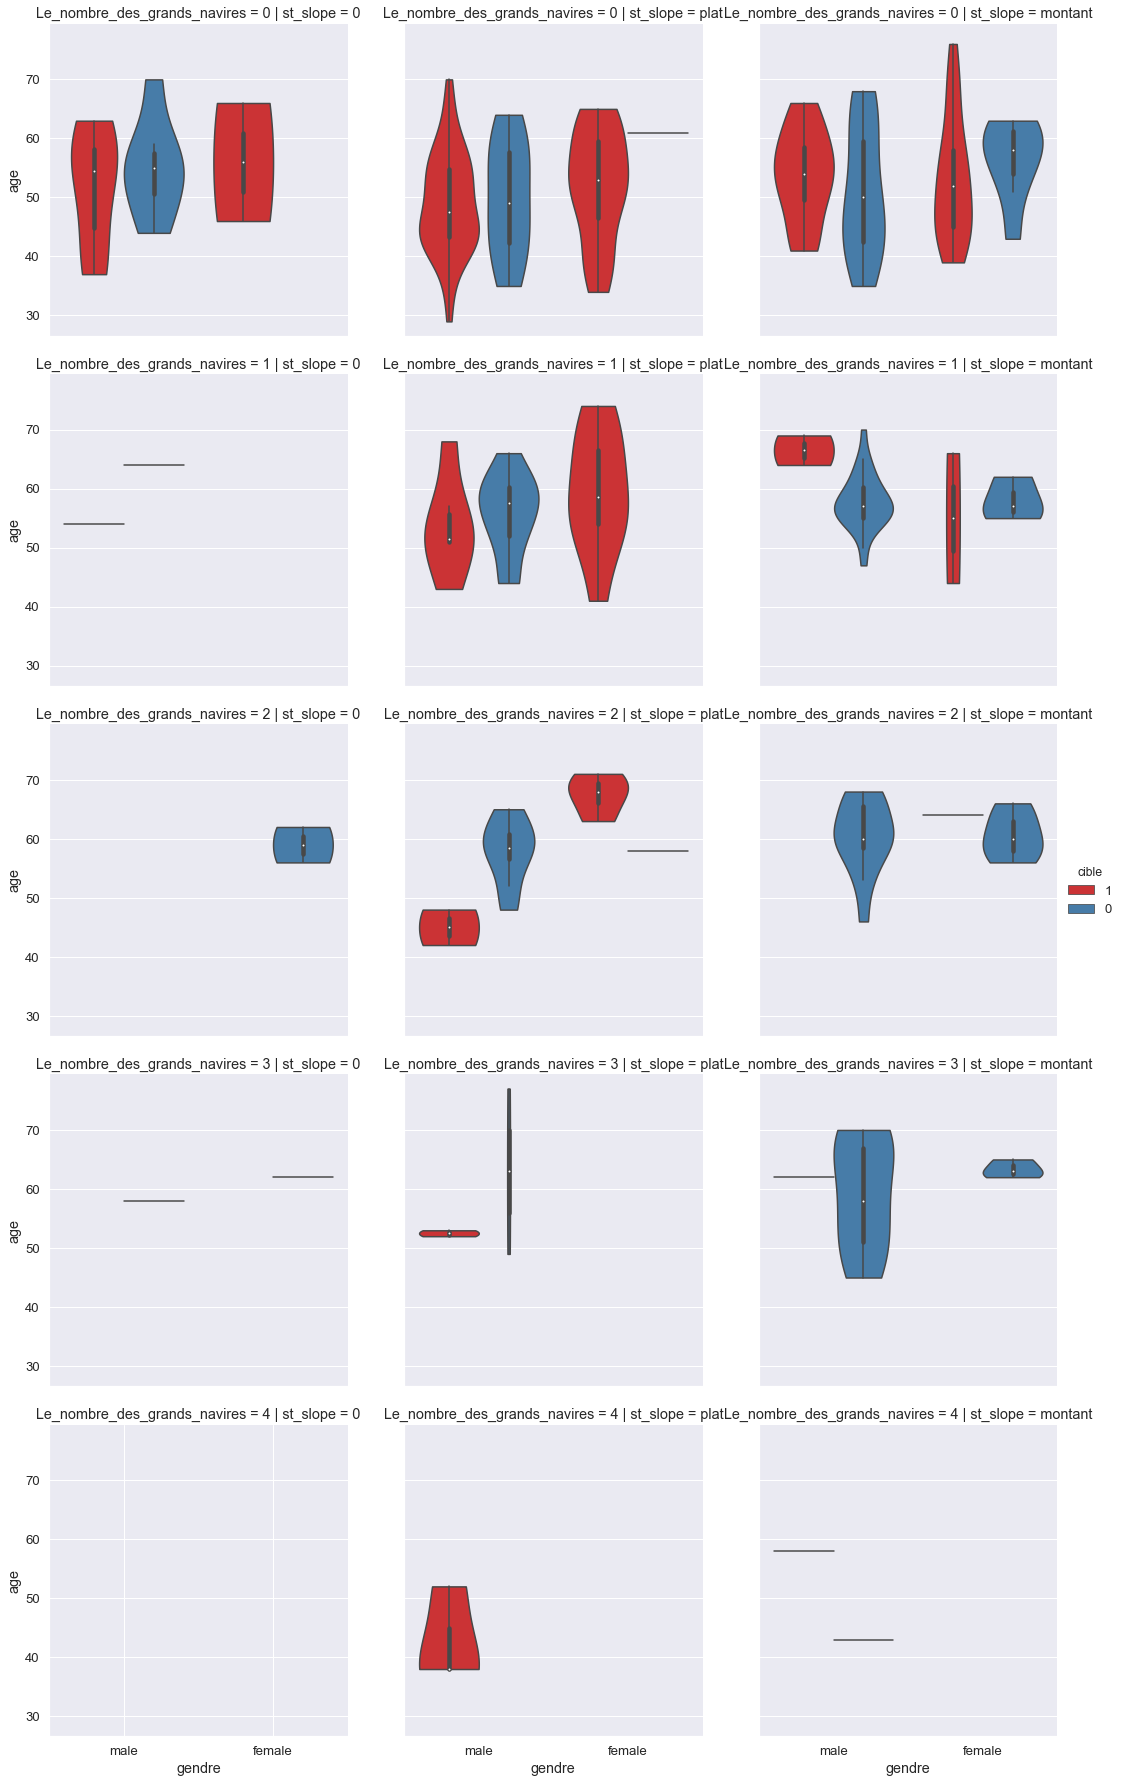

In [7]:
sns.catplot(data=dt , x="gendre" , y="age" , hue='cible' , palette='Set1' , kind='violin' , row="Le_nombre_des_grands_navires",
           col="st_slope" , hue_order=[1 , 0] , cut=0 )

In [8]:
dt = pd.get_dummies(dt, drop_first=True)

In [9]:
dt.head()

age  tension_artérielle_au_repos  cholestérol  \
0   63                          145          233   
1   37                          130          250   
2   41                          130          204   
3   56                          120          236   
4   57                          120          354   

   max_rythme_cardiaque_atteint  st_dépression  Le_nombre_des_grands_navires  \
0                           150            2.3                             0   
1                           187            3.5                             0   
2                           172            1.4                             0   
3                           178            0.8                             0   
4                           163            0.6                             0   

   cible  gendre_male  type_du_douleur_en_poitrine_angine atypique  \
0      1            1                                            0   
1      1            1                                            1   
2      1            0                                            0   
3      1            1                                            0   
4      1            0                                            0   

   type_du_douleur_en_poitrine_angine typique  \
0                                           0   
1                                           0   
2                                           1   
3                                           1   
4                                           0   

   type_du_douleur_en_poitrine_douleur non angineuse  \
0                                                  1   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   

   glycémie_à_jeun_plus grand que 120mg/ml  \
0                                        1   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   Mesure_électrocardiographique_au_repos_Ordinaire  \
0                                                 1   
1                                                 0   
2                                                 1   
3                                                 0   
4                                                 0   

   Mesure_électrocardiographique_au_repos_hypertrophie ventriculaire gauche  \
0                                                  0                          
1                                                  0                          
2                                                  0                          
3                                                  0                          
4                                                  0                          

   angine_de_poitrine_induite_par_exercice_oui  st_slope_montant  \
0                                            0                 0   
1                                            0                 0   
2                                            0                 0   
3                                            0                 0   
4                                            1                 0   

   st_slope_plat  thalassémie_défaut fixe  thalassémie_défaut réversible  \
0              0                        0                              0   
1              0                        1                              0   
2              1                        1                              0   
3              1                        1                              0   
4              1                        1                              0   

   thalassémie_normal  
0                   1  
1                   0  
2                   0  
3                   0  
4                   0

## maintenant, créons notre modèle

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
y=dt['cible']
X=dt.drop('cible' , 1)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [13]:
from sklearn.ensemble import RandomForestClassifier
r = RandomForestClassifier( max_depth=5 , random_state=2 , n_estimators=15 )
r.fit(X_train , y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=None,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

In [14]:
estimator = r.estimators_[1]
feature_names = [i for i in X_train.columns]

y_train_str = y_train.astype('str')
y_train_str[y_train_str == '0'] = 'pas de maladie'
y_train_str[y_train_str == '1'] = 'a une maladie'
y_train_str = y_train_str.values

### l'arbre de décision basé sur notre model

In [15]:
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='treea.dot',
                 feature_names = feature_names,class_names = y_train_str,rounded = True,
                 proportion = True, label='root',precision = 2, filled = True)


In [16]:
from subprocess import call
call(['dot', '-Tpng', 'treea.dot', '-o', 'treea.png', '-Gdpi=600'] , shell=True)

from IPython.display import Image
Image(filename = 'treea.png')

In [17]:
import numpy as np
import xgboost as xgb
xg_cl = xgb.XGBClassifier(objective="binary:logistic" , n_estimators=1000  ,booster='gbtree', learning_rate=0.015 
,max_depth=3 )
xg_cl.fit(X_train , y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.015, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [18]:
from sklearn.metrics import classification_report
print(classification_report(xg_cl.predict(X_test) , y_test))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92        19
           1       0.96      0.93      0.94        27

   micro avg       0.93      0.93      0.93        46
   macro avg       0.93      0.94      0.93        46
weighted avg       0.94      0.93      0.94        46



In [19]:
pred = xg_cl.predict(X_test)
accuracy = float(np.sum(pred == y_test)) / y_test.shape[0]
print( "la précision de notre modèle est " + str(accuracy * 100) + " %")

la précision de notre modèle est 93.47826086956522 %


In [20]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, xg_cl.predict_proba(X_test)[:,1])

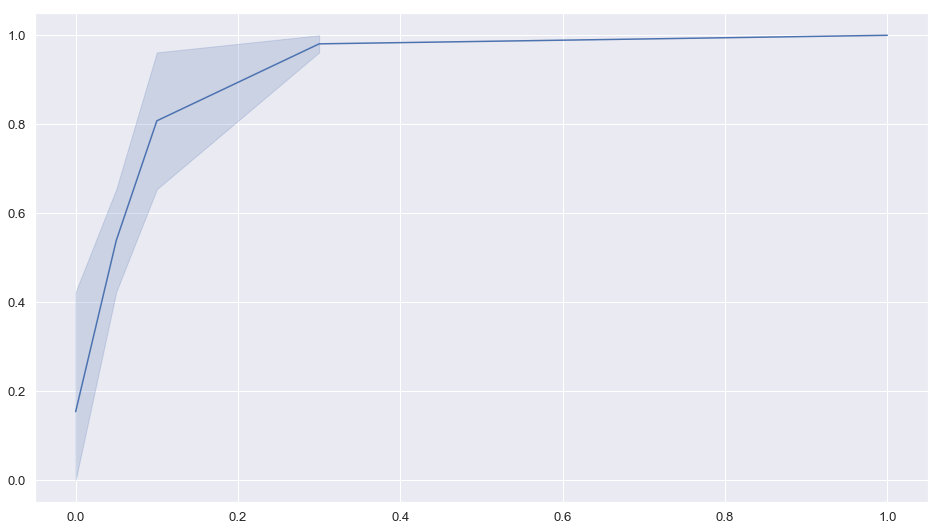

In [21]:
sns.lineplot(fpr , tpr)

Une autre métrique commune est ** l'aire sous la courbe ** ou ** l'ASC **. C'est un moyen pratique de capturer les performances d'un modèle en un seul nombre, même si certains problèmes ne se posent pas. En règle générale, une AUC peut être classée comme suit:

- 0,90 - 1,00 = excellent
- 0.80 - 0.90 = bien
- 0,70 - 0,80 = passable
- 0,60 - 0,70 = faible
- 0,50 - 0,60 = échec

Voyons ce que le ROC ci-dessus nous donne,

In [22]:
auc(fpr, tpr)

0.9461538461538461

Voici un graph qui montre que la relation entre Le_nombre_des_grands_navires et st_dépression

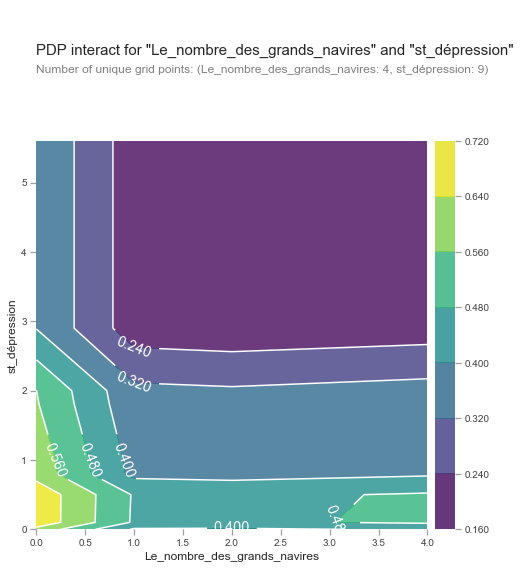

In [23]:
from pdpbox import pdp, info_plots #for partial plots
base_features = dt.columns.values.tolist()
base_features.remove('cible')

inter1  =  pdp.pdp_interact(model=xg_cl , dataset=X_test, model_features=base_features,
features=['Le_nombre_des_grands_navires', 'st_dépression'])
pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=['Le_nombre_des_grands_navires', 'st_dépression'],
plot_type='contour')
plt.show()

## c'est la partie importante
#### ce graph montre quelles fonctionnalités ont un effet plus important sur la prédiction hors modèle
- Le_nombre_des_grands_navires qui ont également du sens pour être au top des fonctionnalités qui effectuent la prédection
- st_dépression , la dépression ST fait référence à une constatation sur un électrocardiogramme, dans laquelle la trace dans le segment ST est anormalement basse en dessous de la ligne de base.  ( wikipedia )
- et thalassémie_défaut fixe a un effet plus élevé (trouble de la circulation sanguine) qui a du sens

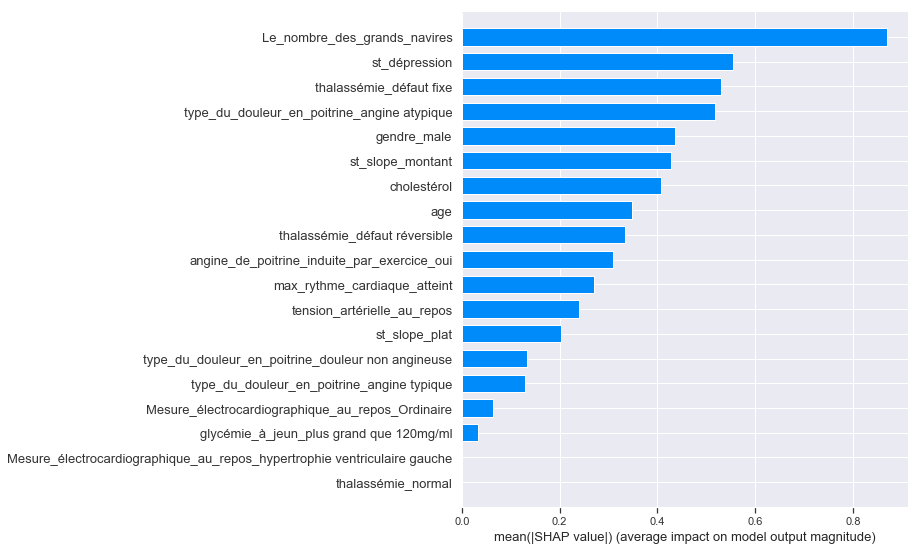

In [24]:
import shap #for SHAP values
explainer = shap.TreeExplainer(xg_cl)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test , plot_type="bar")

## voici une meilleure façon de le décrire
### Le rouge représente la valeur haute et le bleu la valeur basse.
### La zone gauche signifie un effet positif sur la prédection tandis que la droite signifie l’opposé
## ex
- Le_nombre_des_grands_navires a 5 valeur (0,1,2,3,4) plus le nombre est bas (bleu = 0), plus le risque de contracter la maladie est élevé, plus le nombre (rouge, violet = 1,2,3,4) est élevé ) le moins de chance de l'obtenir
-  le meme pour st_dépression 
- thalassémie_défaut fixe ne peut obtenir que 2 valeurs 0 pour non et 1 pour oui, plus cette valeur est élevée (rouge = 1 = oui), plus le risque de contracter une maladie est élevé, plus la valeur est basse (bleu = 0 = non) le plus faible risque d'avoir une maladie

et nous pouvons appliquer la même logique pour chaque fonctionnalité

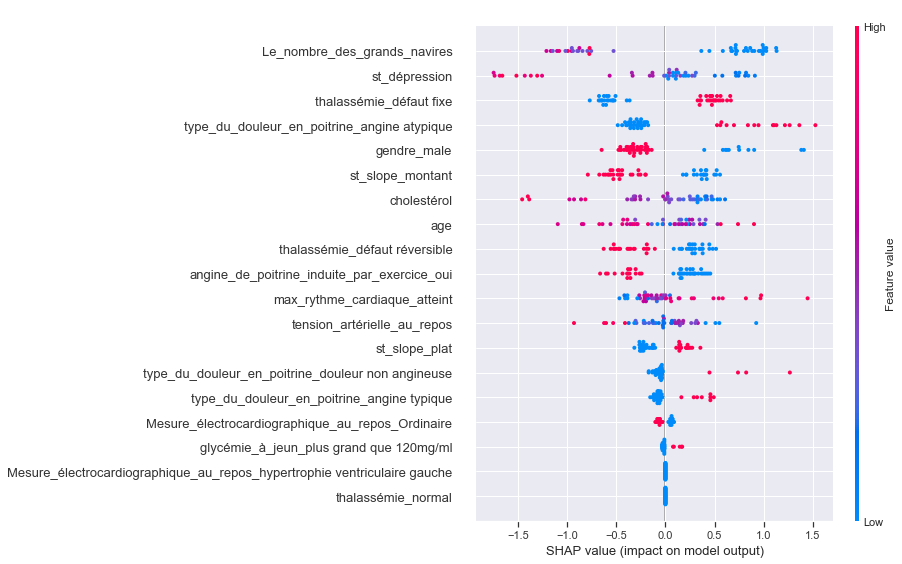

In [25]:
shap.summary_plot(shap_values, X_test)

## Mais comment décomposer le fonctionnement du modèle pour une prédiction individuelle?

## Rappelez-vous la matrice de confusion qui nous donne le score, dans le modèle, nous avons séparer les donnéesen train et test  sections
## laisse voir ce que le modèle prédit pour la première personne dans les données de test
### cette personne a 8% de chance d'avoir une maladie, pourquoi ?? Le_nombre_des_grands_navires = 0 qui est mauvais, mais les autres caractéristiques qui l’aident à ne pas souffrir de maladie cardiaque sont: st_depression = 5.6, thalassémie_défaut fixe = 0 = 'non' et autres.

In [26]:
import shap  # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(xg_cl)
data_for_prediction = X_test.iloc[0]
# Calculate Shap values
shap_values = explainer.shap_values(data_for_prediction , )
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], data_for_prediction , link='logit', text_rotation=20)

## nous pouvons tracer plusieurs prévisions et la bonne réponse à partir des données de test

In [27]:
from metakernel.display import display

In [28]:
for i in range(0,10):
    x = xg_cl.predict_proba(X_test)[i][1]
    explainer = shap.TreeExplainer(xg_cl)
    data_for_prediction = X_test.iloc[i]
    shap_values = explainer.shap_values(data_for_prediction)
    c = shap.force_plot(explainer.expected_value, shap_values[0], data_for_prediction, link='logit' )
    if y_test.iloc[i] == 0 :
        v = "Pas de maladie"
    else:
        v = "A une maladie" 
    print ("nombre ID : " + str(i))
    print(' ')
    print ("la prédiction dit que cette personne a " + str(x) + " % de chance d'avoir une maladie")
    print ("la valeur correcte dans la table de test : " + v )
    print (display(c))
    print('------------------------------')
    
    

nombre ID : 0
 
la prédiction dit que cette personne a 0.078343555 % de chance d'avoir une maladie
la valeur correcte dans la table de test : Pas de maladie


None
------------------------------
nombre ID : 1
 
la prédiction dit que cette personne a 0.893556 % de chance d'avoir une maladie
la valeur correcte dans la table de test : A une maladie


None
------------------------------
nombre ID : 2
 
la prédiction dit que cette personne a 0.6906559 % de chance d'avoir une maladie
la valeur correcte dans la table de test : A une maladie


None
------------------------------
nombre ID : 3
 
la prédiction dit que cette personne a 0.9261057 % de chance d'avoir une maladie
la valeur correcte dans la table de test : A une maladie


None
------------------------------
nombre ID : 4
 
la prédiction dit que cette personne a 0.0034782868 % de chance d'avoir une maladie
la valeur correcte dans la table de test : Pas de maladie


None
------------------------------
nombre ID : 5
 
la prédiction dit que cette personne a 0.9856822 % de chance d'avoir une maladie
la valeur correcte dans la table de test : A une maladie


None
------------------------------
nombre ID : 6
 
la prédiction dit que cette personne a 0.99560994 % de chance d'avoir une maladie
la valeur correcte dans la table de test : A une maladie


None
------------------------------
nombre ID : 7
 
la prédiction dit que cette personne a 0.005783481 % de chance d'avoir une maladie
la valeur correcte dans la table de test : Pas de maladie


None
------------------------------
nombre ID : 8
 
la prédiction dit que cette personne a 0.018756604 % de chance d'avoir une maladie
la valeur correcte dans la table de test : Pas de maladie


None
------------------------------
nombre ID : 9
 
la prédiction dit que cette personne a 0.5644176 % de chance d'avoir une maladie
la valeur correcte dans la table de test : A une maladie


None
------------------------------


## voici le même graphique, mais avec tous les index

In [29]:
data_for_prediction = X_test
shap_values = explainer.shap_values(data_for_prediction)
shap.force_plot(explainer.expected_value, shap_values, data_for_prediction)